<a href="https://colab.research.google.com/github/Trrunghau/AI/blob/main/CNN4flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

folder = '/content/drive/MyDrive/hoa/hoa_train/'

photos1, labels1 = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('cuc'):
    output = 1.0
  if file.startswith('huongduong'):
    output = 2.0
  if file.startswith('hong'):
    output = 3.0
  if file.startswith('sen'):
    output = 4.0
  if file.startswith('mai'):
    output = 5.0
  photo = load_img(folder + file, target_size = (100,100))
  photo = img_to_array(photo)
  photos1.append(photo)
  labels1.append(output)
photos_train = asarray(photos1)
labels_train = asarray(labels1)
print(photos_train.shape, labels_train.shape)
save('/content/drive/MyDrive/Colab Notebooks/photos.npy',photos_train)
save('/content/drive/MyDrive/Colab Notebooks/labels.npy',labels_train)

folder = '/content/drive/MyDrive/hoa/hoa_test/'

photos2, labels2 = list(), list()
for file in listdir(folder) :
  output = 0.0
  if file.startswith('cuc'):
    output = 1.0
  if file.startswith('huongduong'):
    output = 2.0
  if file.startswith('hong'):
    output = 3.0
  if file.startswith('sen'):
    output = 4.0
  if file.startswith('mai'):
    output = 5.0
  photo = load_img(folder + file, target_size = (100,100))
  photo = img_to_array(photo)
  photos2.append(photo)
  labels2.append(output)
photos_test = asarray(photos2)
labels_test = asarray(labels2)
print(photos_test.shape, labels_test.shape)
save('/content/drive/MyDrive/anhlop_test/photos.npy',photos_test)
save('/content/drive/MyDrive/anhlop_test/labels.npy',labels_test)

(100, 100, 100, 3) (100,)
(25, 100, 100, 3) (25,)


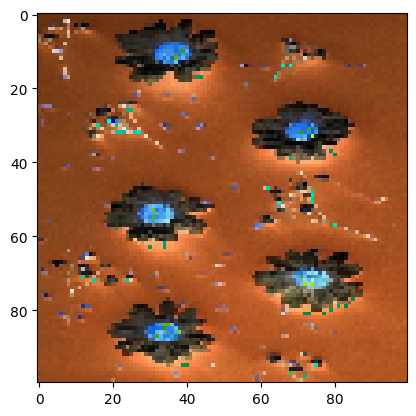

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
idx = 60
img = photos_train[idx]
plt.imshow((img*255).astype(np.uint8))
plt.show()

In [ ]:
photos_train = photos_train.reshape(100, 100, 100, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape(25, 100, 100, 3)
photos_test = photos_test.astype('float32')/255

from keras.utils import  to_categorical
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape

((100, 100, 100, 3), (100, 6), (25, 100, 100, 3), (25, 6))

In [ ]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU
batch_size = 64
epochs = 20
classes = 6

model = Sequential()
#CNN
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',
                 input_shape = (100,100,3), padding = 'same')) 

model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))

In [ ]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size , 
                  epochs = epochs, verbose = 1)

test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('do chinh xac', test_acc)
print('ham mat mat', test_loss)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                  

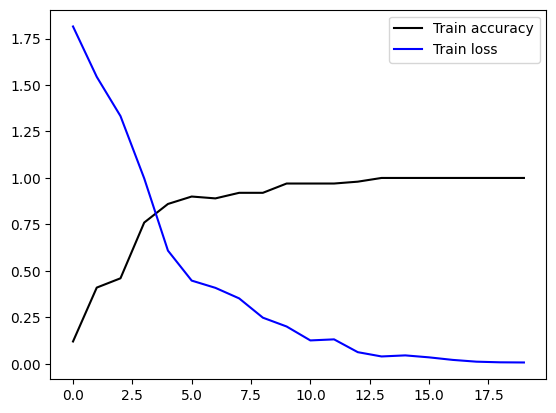

In [ ]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'b', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/modelflower.h5')
class_name = {1: 'cuc',2: 'huong duong',3: 'hong',
                  4: 'sen',5: 'mai'}

1/1 [==============================] - 0s 115ms/step
Predicted:  cuc


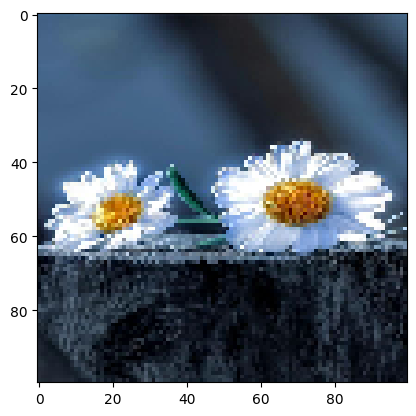

In [ ]:
#test
filePath = '/content/drive/MyDrive/hoa/hoa_test/cuc25.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(100,100))
arrayImage = img_to_array(testImage).reshape(1,100,100,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_name[pred])
plt.imshow(testImage)